In [6]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [7]:
df = pd.read_excel('BBDD.xlsx')

In [8]:
df.head()

,review_en,review_es,sentiment,sentimiento
0,One of the other reviewers has mentioned that ...,Uno de los otros críticos ha mencionado que de...,positive,positivo
1,A wonderful little production. The filming tec...,Una pequeña pequeña producción.La técnica de f...,positive,positivo
2,I thought this was a wonderful way to spend ti...,Pensé que esta era una manera maravillosa de p...,positive,positivo
3,Basically there's a family where a little boy ...,"Básicamente, hay una familia donde un niño peq...",negative,negativo
4,"Petter Mattei's ""Love in the Time of Money"" is...","El ""amor en el tiempo"" de Petter Mattei es una...",positive,positivo


In [20]:
df

,review_en,review_es,sentiment,sentimiento
0,One of the other reviewers has mentioned that ...,Uno de los otros críticos ha mencionado que de...,positive,positivo
1,A wonderful little production. The filming tec...,Una pequeña pequeña producción.La técnica de f...,positive,positivo
2,I thought this was a wonderful way to spend ti...,Pensé que esta era una manera maravillosa de p...,positive,positivo
3,Basically there's a family where a little boy ...,"Básicamente, hay una familia donde un niño peq...",negative,negativo
4,"Petter Mattei's ""Love in the Time of Money"" is...","El ""amor en el tiempo"" de Petter Mattei es una...",positive,positivo
...,...,...,...,...
49995,I thought this movie did a down right good job...,Pensé que esta película hizo un buen trabajo a...,positive,positivo
49996,"Bad plot, bad dialogue, bad acting, idiotic di...","Mala parcela, mal diálogo, mala actuación, dir...",negative,negativo
49997,I am a Catholic taught in parochial elementary...,Soy católica enseñada en escuelas primarias pa...,negative,negativo
49998,I'm going to have to disagree with the previou...,Voy a tener que estar en desacuerdo con el com...,negative,negativo


In [21]:
df = df[['sentimiento', 'review_es']].copy()

In [22]:
df.head()

,sentimiento,review_es
0,positivo,Uno de los otros críticos ha mencionado que de...
1,positivo,Una pequeña pequeña producción.La técnica de f...
2,positivo,Pensé que esta era una manera maravillosa de p...
3,negativo,"Básicamente, hay una familia donde un niño peq..."
4,positivo,"El ""amor en el tiempo"" de Petter Mattei es una..."


<Axes: >

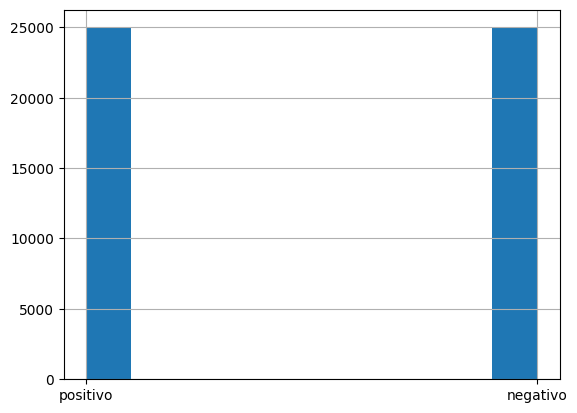

In [23]:
df['sentimiento'].hist()

In [24]:
target_map = {'positivo': 1, 'negativo': 0}
df['target'] = df['sentimiento'].map(target_map)

In [25]:
df.head()

,sentimiento,review_es,target
0,positivo,Uno de los otros críticos ha mencionado que de...,1
1,positivo,Una pequeña pequeña producción.La técnica de f...,1
2,positivo,Pensé que esta era una manera maravillosa de p...,1
3,negativo,"Básicamente, hay una familia donde un niño peq...",0
4,positivo,"El ""amor en el tiempo"" de Petter Mattei es una...",1


In [26]:
df_train, df_test = train_test_split(df)

In [27]:
df_train

,sentimiento,review_es,target
41460,negativo,Si estás de humor para un divertido entretenim...,0
21574,negativo,"La miel, encogí que la franquicia de los niños...",0
22907,positivo,Ubicado en la ciudad natal de Bam Margera de W...,1
32144,negativo,Los años 60 (1999) D: Mark Piznarski.Josh Hami...,0
21555,negativo,El paseo elefante era una película completamen...,0
...,...,...,...
40796,positivo,"Un amigo mío preguntó: ""¿No tiene que ser pro-...",1
20877,negativo,"Propaganda temprana, pesada y de guerra que in...",0
20842,negativo,Bashers (2 Outta 5 estrellas) No es realmente ...,0
30212,positivo,Otra excelente película de Arnold.Esta películ...,1


In [28]:
df_test

,sentimiento,review_es,target
14787,positivo,Esta película típica de adolescentes es una de...,1
30580,positivo,No me alejaré nada al describir la trama de es...,1
25877,positivo,El hombre en funcionamiento es una de esas pel...,1
39583,positivo,La jungla es más de una aventura que una pelíc...,1
27864,positivo,¿Por qué deberías ver esto?¡Ciertamente no hay...,1
...,...,...,...
22174,negativo,No hay personajes simpáticos (el liderazgo es ...,0
20508,negativo,Jeux D'Enfants o cómo la película fue traducid...,0
40514,positivo,Recientemente he visto esta película debido al...,1
37611,negativo,Me hablé de ver esto por una novia ... ¡Dios e...,0


In [29]:
vectorizer = TfidfVectorizer(max_features=2000)

In [30]:
X_train = vectorizer.fit_transform(df_train['review_es'])

In [31]:
X_train

<37500x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 3462324 stored elements in Compressed Sparse Row format>

In [32]:
X_test = vectorizer.transform(df_test['review_es'])
X_test

<12500x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 1156871 stored elements in Compressed Sparse Row format>

In [33]:
Y_train = df_train['target']
Y_test = df_test['target']

In [34]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)
print("Train acc:", model.score(X_train, Y_train))
print("Test acc:", model.score(X_test, Y_test))

Train acc: 0.8782133333333333
Test acc: 0.866


In [35]:
P_train = model.predict(X_train)
P_test = model.predict(X_test)

In [36]:
cm = confusion_matrix(Y_train, P_train, normalize='true')
cm

array([[0.86694409, 0.13305591],
       [0.11052463, 0.88947537]])

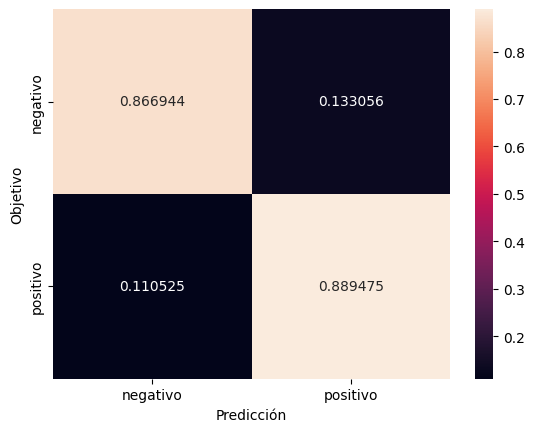

In [37]:
def plot_cm(cm):
    classes = ['negativo', 'positivo']
    df_cm = pd.DataFrame(cm, index=classes, columns=classes)
    ax = sn.heatmap(df_cm, annot=True, fmt='g')
    ax.set_xlabel("Predicción")
    ax.set_ylabel("Objetivo")

plot_cm(cm)

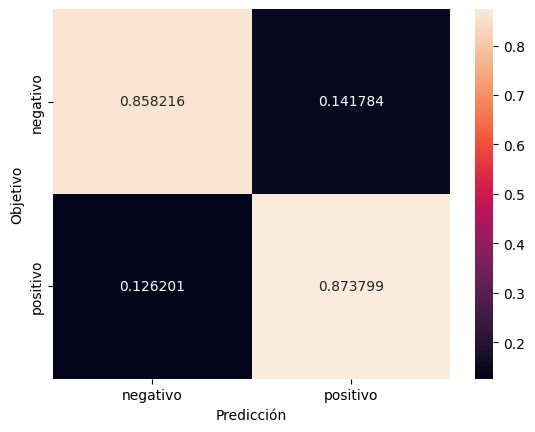

In [38]:
cm = confusion_matrix(Y_test, P_test, normalize='true')
plot_cm(cm)

In [39]:
word_index_map = vectorizer.vocabulary_
word_index_map

{'si': 1663,
 'estás': 698,
 'de': 442,
 'humor': 919,
 'para': 1336,
 'un': 1867,
 'divertido': 532,
 'entretenimiento': 616,
 'esto': 685,
 'el': 573,
 'tiempo': 1803,
 'espera': 660,
 'una': 1868,
 'no': 1252,
 'se': 1617,
 'mí': 1222,
 'la': 1026,
 'escena': 630,
 'baile': 173,
 'parecía': 1341,
 'que': 1509,
 'era': 621,
 'efecto': 568,
 'cómico': 430,
 'especialmente': 653,
 'caliente': 243,
 'ni': 1242,
 'los': 1080,
 'niños': 1251,
 'gran': 820,
 'sin': 1680,
 'mencionar': 1145,
 'muy': 1218,
 'famoso': 737,
 'me': 1136,
 'encantó': 593,
 'cuando': 413,
 'pequeña': 1375,
 'historia': 892,
 'original': 1311,
 'tenía': 1774,
 'trama': 1842,
 'tan': 1753,
 'emocionante': 584,
 'conjuntos': 360,
 'eran': 622,
 'increíbles': 951,
 'reparto': 1558,
 'compañía': 345,
 'del': 462,
 'otro': 1321,
 'ahora': 65,
 'al': 68,
 'niño': 1250,
 'bastante': 181,
 'estúpido': 701,
 'así': 148,
 'creo': 398,
 'volver': 1949,
 'todos': 1819,
 'básicamente': 232,
 'está': 694,
 'poco': 1419,
 'más':

In [42]:
model.coef_[0]

array([-0.76738845,  1.87477548,  0.44356134, ...,  0.21722495,
       -1.44883385, -1.83726801])

In [43]:
corte = 4

print("Palabras más positivas:")
for word, index in word_index_map.items():
    weight = model.coef_[0][index]
    if weight > corte:
        print(word, weight)

Palabras más positivas:
encantó 4.827054763675186
excelente 7.970320775386501
increíble 4.161272196116203
hoy 4.318507356913754
genial 4.171802433624788
recomiendo 4.169297428658295
excelentes 4.315068991611751
maravillosa 4.156867535215308
disfruté 4.012217117447083
perfecto 4.324666883051745


In [45]:
print("Palabras más negativas:")
for word, index in word_index_map.items():
    weight = model.coef_[0][index]
    if weight < -corte:
        print(word, weight)

Palabras más negativas:
no -4.362311834280058
basura -5.113366185653364
malo -4.32539051369793
horrible -8.940174108664223
aburrida -6.46229637757009
aburrido -6.5886716690637765
peor -10.006587799545441
nada -4.018266565099169
minutos -4.401556248948083
mala -7.581784594561729
desafortunadamente -4.7470968194129854
terrible -7.130150424658868
mal -5.625466965427654
decepción -5.37061450146568
pobre -5.5355526508138455
molesto -4.027637496654206
peores -7.168827651100146
mierda -4.226639928933249
decepcionante -4.495287786733361
desperdicio -4.046421173700084


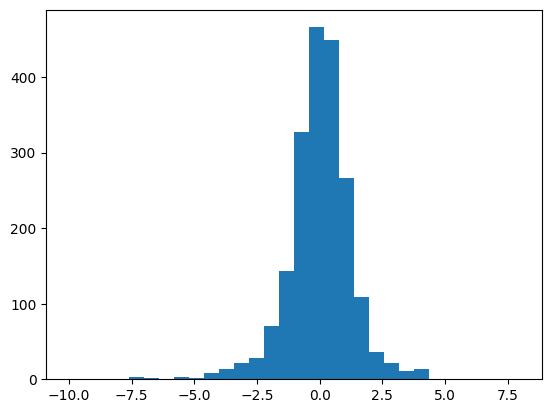

In [44]:
plt.hist(model.coef_[0], bins=30);

In [50]:
prueba = ["estuvo muy entretenida la película", "estuvo terrible la película, me aburrí mucho", "no la recomiendo", "la"]

# Transformar la entrada con el vectorizador
x = vectorizer.transform(prueba)



In [51]:
# Predecir con el modelo
P = model.predict(x)

In [52]:
# Obtener las clases del modelo
clases = model.classes_

In [53]:
# Mostrar la clase predicha
for i in range (len(prueba)):
    if clases[P[i]] == 0:
        print(f"el Comentario: '{prueba[i]}' es: Negativo")
    else:
        print(f"el Comentario: '{prueba[i]}' es: Positivo")

el Comentario: 'estuvo muy entretenida la película' es: Positivo
el Comentario: 'estuvo terrible la película, me aburrí mucho' es: Negativo
el Comentario: 'no la recomiendo' es: Positivo
el Comentario: 'la' es: Positivo


# Multiclases

In [54]:
df = pd.read_csv('Twitter_Data.csv')

In [55]:
df

,clean_text,category
0,when modi promised “minimum government maximum...,Negativo
1,talk all the nonsense and continue all the dra...,Neutro
2,what did just say vote for modi welcome bjp t...,Positivo
3,asking his supporters prefix chowkidar their n...,Positivo
4,answer who among these the most powerful world...,Positivo
...,...,...
162963,why these 456 crores paid neerav modi not reco...,Negativo
162964,dear rss terrorist payal gawar what about modi...,Negativo
162965,did you cover her interaction forum where she ...,Neutro
162966,there big project came into india modi dream p...,Neutro


<Axes: >

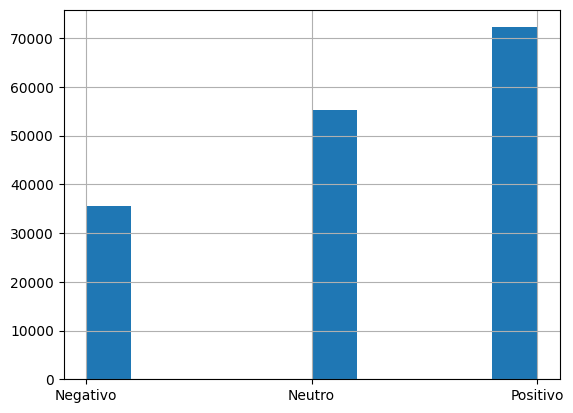

In [56]:
df['category'].hist()

In [57]:
target_map = {'Positivo': 1, 'Negativo': 0, 'Neutro': 2}
df['target'] = df['category'].map(target_map)

In [58]:
df

,clean_text,category,target
0,when modi promised “minimum government maximum...,Negativo,0
1,talk all the nonsense and continue all the dra...,Neutro,2
2,what did just say vote for modi welcome bjp t...,Positivo,1
3,asking his supporters prefix chowkidar their n...,Positivo,1
4,answer who among these the most powerful world...,Positivo,1
...,...,...,...
162963,why these 456 crores paid neerav modi not reco...,Negativo,0
162964,dear rss terrorist payal gawar what about modi...,Negativo,0
162965,did you cover her interaction forum where she ...,Neutro,2
162966,there big project came into india modi dream p...,Neutro,2


In [59]:
df_train, df_test = train_test_split(df)

In [60]:
df_train.head()

,clean_text,category,target
24281,who told you that you’ been anti national sinc...,Neutro,2
153598,please read people\nwhile modi chose varanasi ...,Neutro,2
105035,like raga modi also shitload fake ideology dem...,Negativo,0
124774,the gods the gurus the stars the voters and la...,Negativo,0
141134,not actually but naxals affected seats were gi...,Positivo,1


In [61]:
df_train

,clean_text,category,target
24281,who told you that you’ been anti national sinc...,Neutro,2
153598,please read people\nwhile modi chose varanasi ...,Neutro,2
105035,like raga modi also shitload fake ideology dem...,Negativo,0
124774,the gods the gurus the stars the voters and la...,Negativo,0
141134,not actually but naxals affected seats were gi...,Positivo,1
...,...,...,...
140133,sir india seeing some good changes because the...,Positivo,1
1542,modi heartbeat india,Neutro,2
139497,sir careful ycp acts coming last days more cru...,Positivo,1
123298,challenge you name one instance modi himself h...,Negativo,0


In [62]:
vectorizer = TfidfVectorizer(max_features=2000)
X_train = vectorizer.fit_transform(df_train['clean_text'])
X_train

<122226x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 1763124 stored elements in Compressed Sparse Row format>

In [63]:
X_test = vectorizer.transform(df_test['clean_text'])
X_test

<40742x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 589338 stored elements in Compressed Sparse Row format>

In [64]:
Y_train = df_train['target']
Y_test = df_test['target']

In [65]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)
print("Train acc:", model.score(X_train, Y_train))
print("Test acc:", model.score(X_test, Y_test))

Train acc: 0.8946378021042986
Test acc: 0.8908742820676452


In [66]:
P_train = model.predict(X_train)
P_test = model.predict(X_test)

In [67]:
cm = confusion_matrix(Y_train, P_train, normalize='true')
cm

array([[0.75466607, 0.12397871, 0.12135522],
       [0.03693912, 0.90049733, 0.06256355],
       [0.00904595, 0.01387046, 0.97708358]])

In [68]:
def plot_cm(cm):
    classes = ['negativo', 'positivo', 'neutro']
    df_cm = pd.DataFrame(cm, index=classes, columns=classes)
    ax = sn.heatmap(df_cm, annot=True, fmt='g')
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Target")

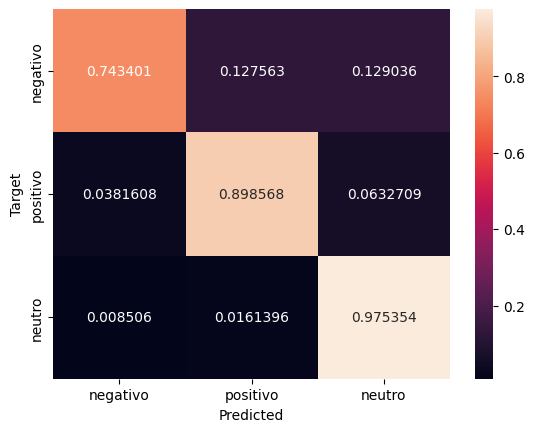

In [69]:
cm_test = confusion_matrix(Y_test, P_test, normalize='true')
plot_cm(cm_test)